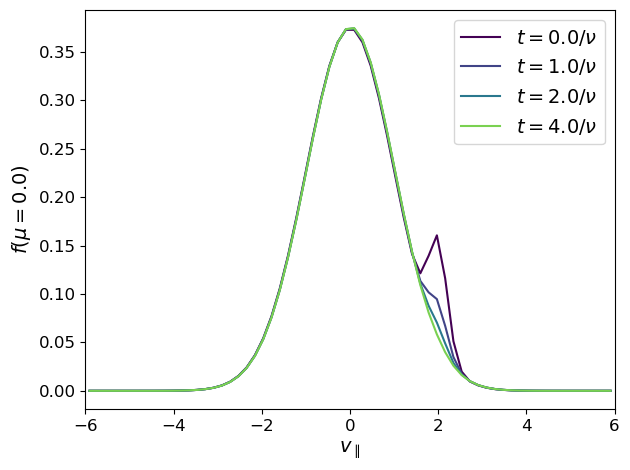

In [3]:
import postgkyl as pg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load data from gkyl files
fileName = simName = 'gk_bgk_relax_1x2v_p1-'
spName = 'bump_' # or 'square'
frame = [0, 1, 2, 4]

polyOrder = 1 
basisType = 'ms'

fig, ax = plt.subplots(figsize=[6.4, 4.8])

cmap = cm.viridis
lblSize = 14
ttlSize = 16
tickSize = 12
lgdSize = 12
txtSize = 14

for i in frame: 
    fileName = simName + spName + str(i)+'.gkyl'
    data = pg.GData(fileName)
    dataInterp = pg.GInterpModal(data, polyOrder, basisType)
    dataInterp.interpolate(overwrite=True)
    grid, distf = pg.data.select(dataInterp.data, z0='0.5', z2='0.0')
    vpar = (grid[1][0:-1]+grid[1][1:])/2.0
    color = cmap(i / (len(frame)+1))
    ax.plot(vpar, np.ravel(distf), label=r'$t=%.1f/\nu$'%i, color=color)
    
#print(np.shape(vpar), np.shape(distf))
ax.set_xlim(grid[1][0], grid[1][-1])
ax.set_xlabel(r'$v_{\parallel}$', fontsize=lblSize)
ax.set_ylabel(r'$f(\mu=0.0)$', fontsize=lblSize)
ax.tick_params(labelsize=tickSize)
plt.legend(fontsize=lblSize)
plt.tight_layout()

plt.savefig('gk_bgk_relax_1x2v_p1-bump_distf.png')

In [ ]:
# Example data for plotting multiple curves
x = np.linspace(0, 10, 100)
y_values = [np.sin(x + i) for i in range(5)]  # 5 different sine curves

# Choose a colormap
cmap = cm.viridis  # or you can try 'plasma', 'inferno', etc.

# Create a figure and axis
fig, ax = plt.subplots()

# Plot each curve with a different color from the colormap
for i, y in enumerate(y_values):
    color = cmap(i / len(y_values))  # Get the color from the colormap
    ax.plot(x, y, label=f"Curve {i+1}", color=color)

# Add labels, title, and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Curves with Sequential Colors')
ax.legend()